In [2]:
# Data Handling and Analysis
import pandas as pd  
import numpy as np  

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns 

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import StandardScaler 

# Data Splitting
from sklearn.model_selection import train_test_split  


In [3]:
# Load datasets
nba_data = pd.read_csv(r"C:\Users\aaron\OneDrive - National College of Ireland\Year 3\Artificial Intelligence and Machine Learning\CA1\data\NBA_all_seasons.csv")

# Print first few rows
print("NBA Dataset:")
display(nba_data.head())

NBA Dataset:


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [4]:
# Explore datasets
print(nba_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

In [5]:
# NBA summary
print("NBA Dataset Statistics:")
display(nba_data.describe())

NBA Dataset Statistics:


,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,6421.500000,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,3707.887763,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3210.750000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,6421.500000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,9632.250000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,12843.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [6]:
# Missing values in NBA data
print("Missing Values in NBA Dataset:")
print(nba_data.isnull().sum())

Missing Values in NBA Dataset:
Unnamed: 0              0
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64


In [12]:
# Drop non-numeric columns
nba_data_numeric = nba_data.select_dtypes(include=['float64', 'int64'])

# Drop the 'Unnamed: 0' column
nba_data = nba_data.drop(columns=['Unnamed: 0'])

# Check for missing values in the numeric columns
missing_values = nba_data_numeric.isnull().sum()

# Drop rows with missing values 
nba_data_clean = nba_data_numeric.dropna()

# Recheck the data types
print(nba_data_clean.dtypes)

Unnamed: 0         int64
age              float64
player_height    float64
player_weight    float64
gp                 int64
pts              float64
reb              float64
ast              float64
net_rating       float64
oreb_pct         float64
dreb_pct         float64
usg_pct          float64
ts_pct           float64
ast_pct          float64
dtype: object


In [14]:
# Save the cleaned data
cleaned_file_path = r"C:\Users\aaron\OneDrive - National College of Ireland\Year 3\Artificial Intelligence and Machine Learning\CA1\data\NBA_all_seasons_cleaned.csv"
nba_data.to_csv(cleaned_file_path, index=False)

# Print confirmation
print(f"Cleaned data saved to {cleaned_file_path}")

Cleaned data saved to C:\Users\aaron\OneDrive - National College of Ireland\Year 3\Artificial Intelligence and Machine Learning\CA1\data\NBA_all_seasons_cleaned.csv


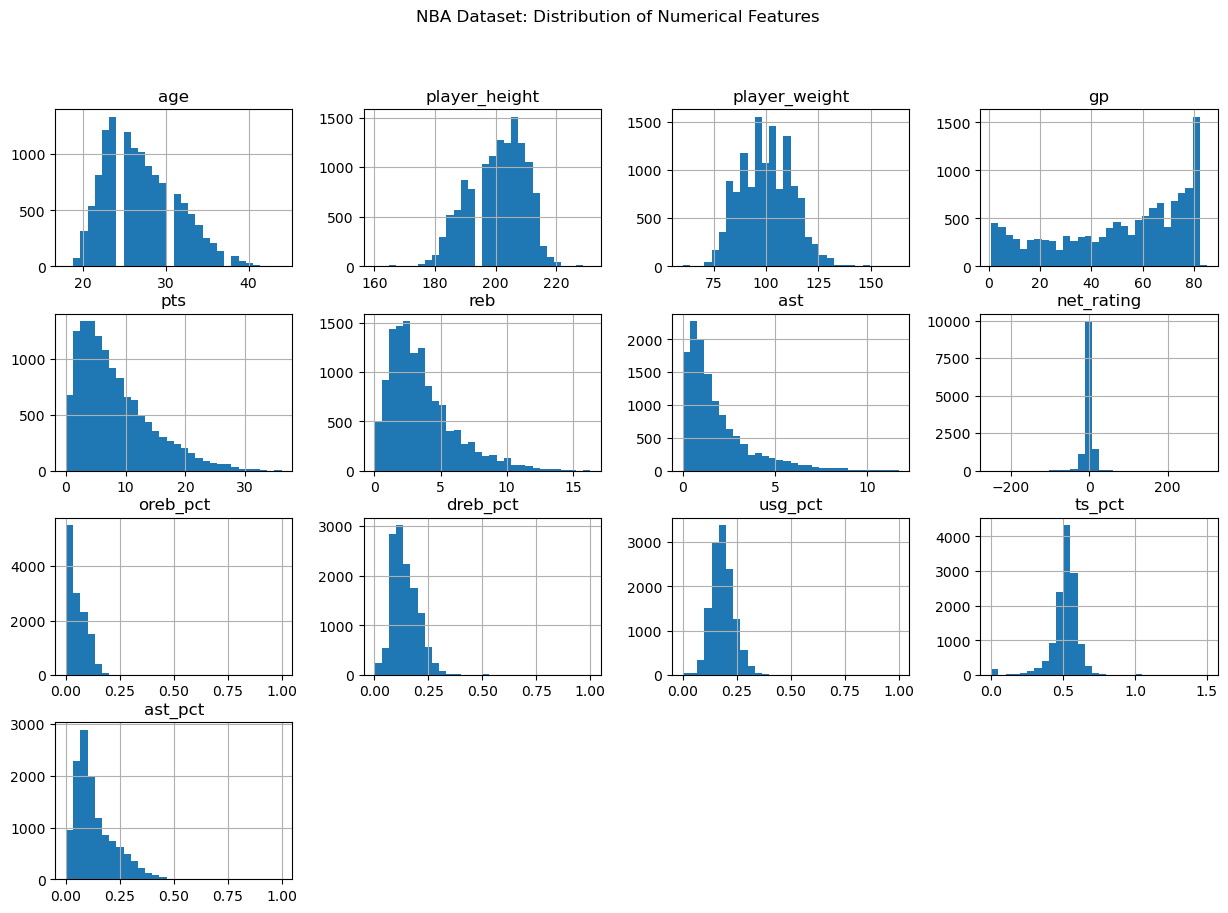

In [16]:
nba_data.hist(figsize=(15, 10), bins=30)
plt.suptitle("NBA Dataset: Distribution of Numerical Features")
plt.show()


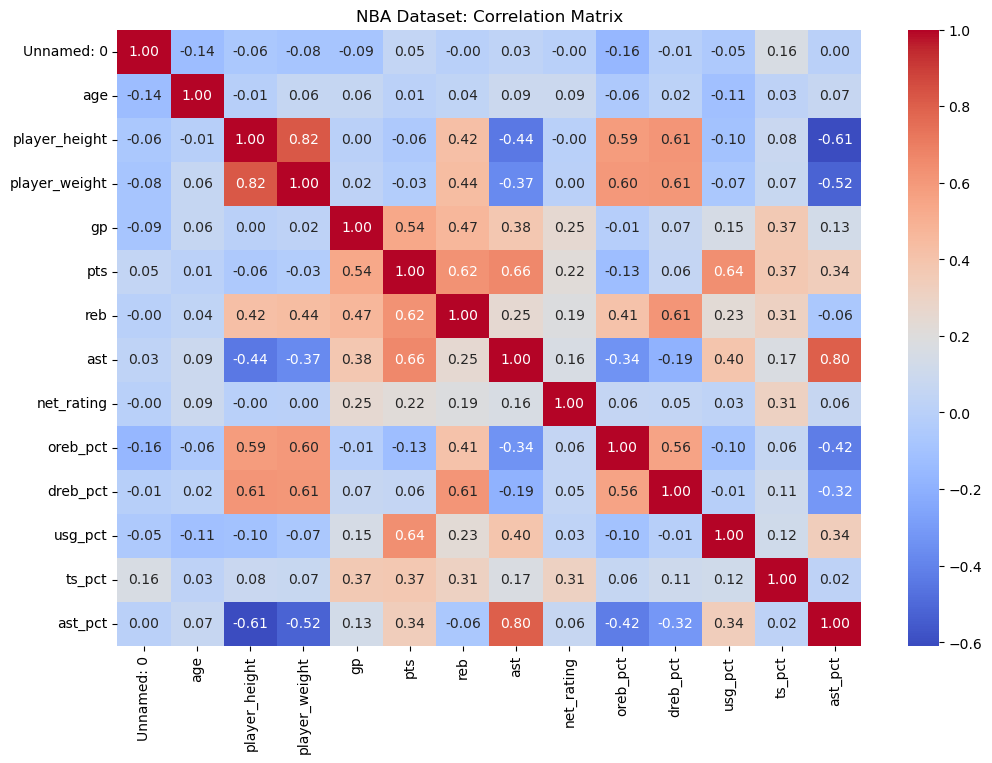

In [17]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(nba_data_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("NBA Dataset: Correlation Matrix")
plt.show()


In [19]:
# Load the housing data
file_path = "C:/Users/aaron/OneDrive - National College of Ireland/Year 3/Artificial Intelligence and Machine Learning/CA1/data/housing_price_dataset.csv"
housing_data = pd.read_csv(file_path)

# Display first few rows
print(housing_data.head())


   SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065


In [22]:
# Dataset info
print("\nDataset Info:")
print(housing_data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB
None


In [24]:
# Dataset statistics
print("\nDataset Statistics:")
print(housing_data.describe())


Dataset Statistics:
         SquareFeet      Bedrooms     Bathrooms     YearBuilt          Price
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000
mean    2006.374680      3.498700      1.995420   1985.404420  224827.325151
std      575.513241      1.116326      0.815851     20.719377   76141.842966
min     1000.000000      2.000000      1.000000   1950.000000  -36588.165397
25%     1513.000000      3.000000      1.000000   1967.000000  169955.860225
50%     2007.000000      3.000000      2.000000   1985.000000  225052.141166
75%     2506.000000      4.000000      3.000000   2003.000000  279373.630052
max     2999.000000      5.000000      3.000000   2021.000000  492195.259972


In [26]:
# Check for missing values
print("\n Housing Missing Values:")
print(housing_data.isnull().sum())


 Housing Missing Values:
SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64


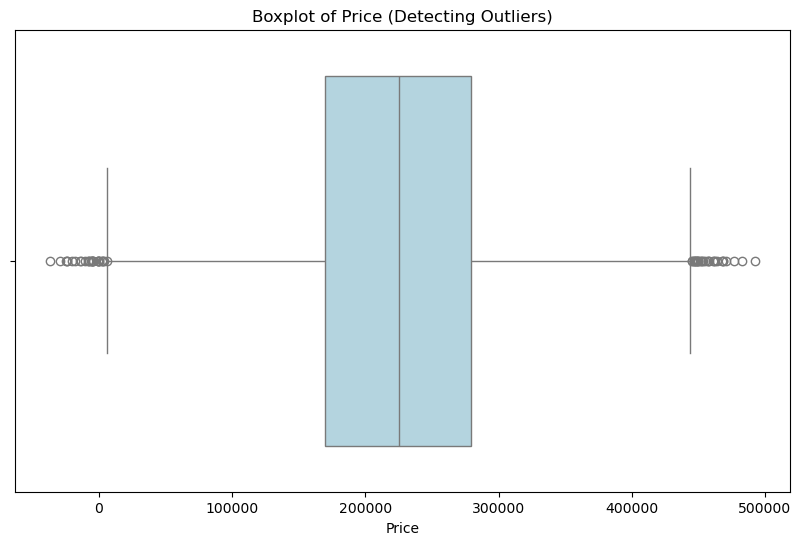

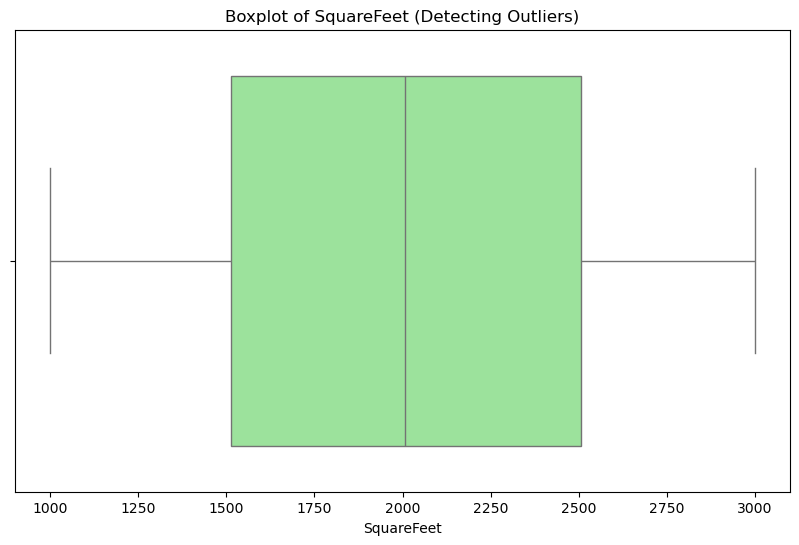

In [28]:
# Boxplot for detecting outliers in 'Price'
plt.figure(figsize=(10, 6))
sns.boxplot(data=housing_data, x='Price', color='lightblue')
plt.title('Boxplot of Price (Detecting Outliers)')
plt.show()

# Boxplot for detecting outliers in 'SquareFeet'
plt.figure(figsize=(10, 6))
sns.boxplot(data=housing_data, x='SquareFeet', color='lightgreen')
plt.title('Boxplot of SquareFeet (Detecting Outliers)')
plt.show()


In [30]:
# Handle outliers in SquareFeet and Price columns using IQR
Q1_squarefeet = housing_data['SquareFeet'].quantile(0.25)
Q3_squarefeet = housing_data['SquareFeet'].quantile(0.75)
IQR_squarefeet = Q3_squarefeet - Q1_squarefeet
lower_bound_squarefeet = Q1_squarefeet - 1.5 * IQR_squarefeet
upper_bound_squarefeet = Q3_squarefeet + 1.5 * IQR_squarefeet

Q1_price = housing_data['Price'].quantile(0.25)
Q3_price = housing_data['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Removing outliers
housing_data = housing_data[(housing_data['SquareFeet'] >= lower_bound_squarefeet) & 
                            (housing_data['SquareFeet'] <= upper_bound_squarefeet)]
housing_data = housing_data[(housing_data['Price'] >= lower_bound_price) & 
                            (housing_data['Price'] <= upper_bound_price)]

In [32]:
# Encode categorical variables (Neighborhood)
housing_data = pd.get_dummies(housing_data, columns=['Neighborhood'], drop_first=True)

# Add the missing 'Rural' column (since it's inferred from 'Suburb' and 'Urban')
housing_data['Neighborhood_Rural'] = ~(housing_data['Neighborhood_Suburb'] | housing_data['Neighborhood_Urban'])

# Create 'Age' of the property
current_year = 2024
housing_data['Age'] = current_year - housing_data['YearBuilt']

# Create interaction term between 'SquareFeet' and 'Bedrooms'
housing_data['SquareFeet_Bedrooms'] = housing_data['SquareFeet'] * housing_data['Bedrooms']

# Apply log transformation to 'Price' (adding 1 to avoid log(0) issues)
housing_data['Log_Price'] = np.log(housing_data['Price'] + 1)

# Handle missing values
housing_data = housing_data.dropna()

# Save the cleaned data
cleaned_file_path = "C:/Users/aaron/OneDrive - National College of Ireland/Year 3/Artificial Intelligence and Machine Learning/CA1/data/housing_price_cleaned.csv"
housing_data.to_csv(cleaned_file_path, index=False)

# Print confirmation
print(f"Cleaned data saved to {cleaned_file_path}")


Cleaned data saved to C:/Users/aaron/OneDrive - National College of Ireland/Year 3/Artificial Intelligence and Machine Learning/CA1/data/housing_price_cleaned.csv


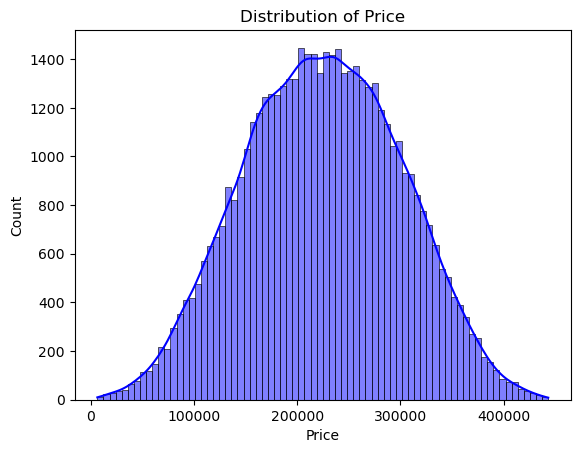

In [34]:
sns.histplot(housing_data['Price'], kde=True, color='blue')
plt.title('Distribution of Price')
plt.show()


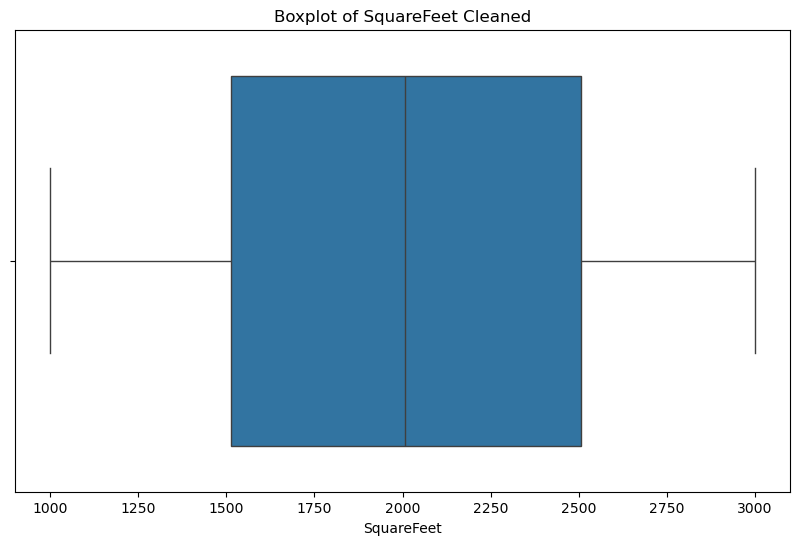

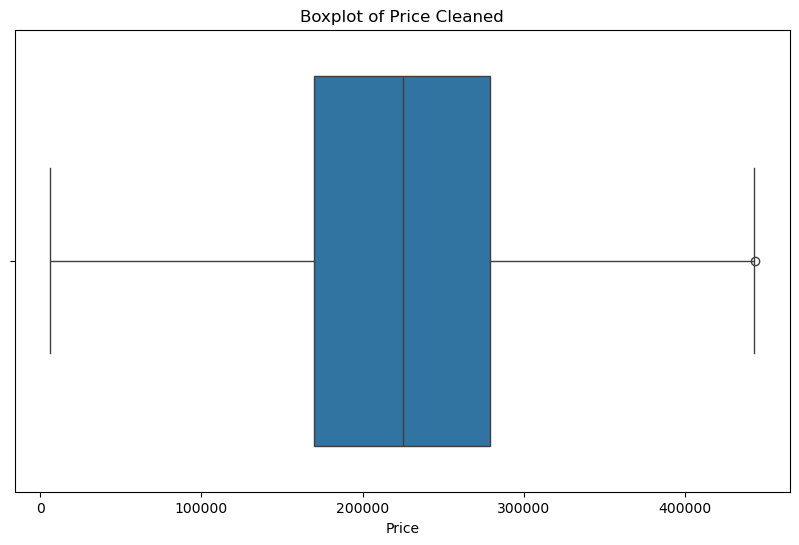

In [42]:
file_path = "C:/Users/aaron/OneDrive - National College of Ireland/Year 3/Artificial Intelligence and Machine Learning/CA1/data/housing_price_cleaned.csv"
housing_price_cleaned = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
sns.boxplot(data=housing_price_cleaned, x='SquareFeet')
plt.title('Boxplot of SquareFeet Cleaned')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=housing_data, x='Price')
plt.title('Boxplot of Price Cleaned')
plt.show()


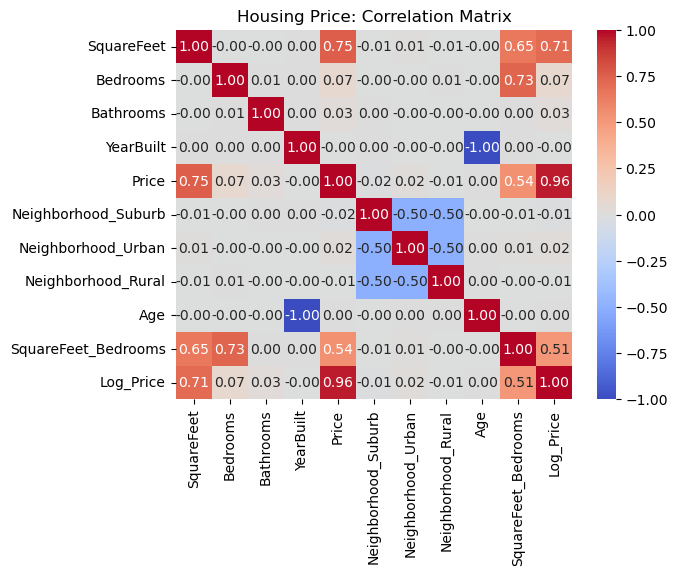

In [38]:
correlation_matrix = housing_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Housing Price: Correlation Matrix')
plt.show()
